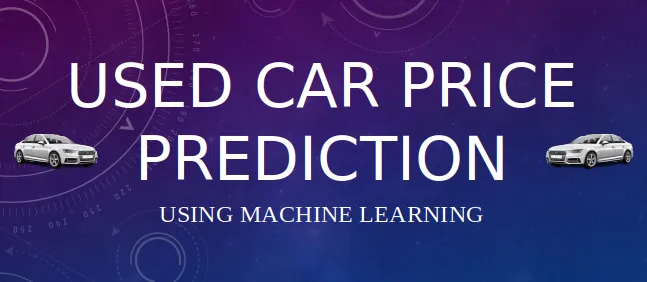

***IMPORTING LIBRARIES***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***IMPORTING DATASET***

In [314]:
df = pd.read_csv('/content/car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


***EXPLORATORY DATA ANALYSIS***

In [315]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [316]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [ ]:
df.shape

(301, 9)

In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

_Summary Statistics_

In [317]:
df.describe().style.format(precision=2).background_gradient(cmap='RdBu')

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.00,301.00,301.00,301.00,301.00
mean,2013.63,4.66,7.63,36947.21,0.04
std,2.89,5.08,8.64,38886.88,0.25
min,2003.00,0.10,0.32,500.00,0.00
25%,2012.00,0.90,1.20,15000.00,0.00
50%,2014.00,3.60,6.40,32000.00,0.00
75%,2016.00,6.00,9.90,48767.00,0.00
max,2018.00,35.00,92.60,500000.00,3.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


_Check for missing values_

In [318]:
df.isna().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


_Data types of columns_

In [319]:
df.dtypes

,0
Car_Name,object
Year,int64
Selling_Price,float64
Present_Price,float64
Driven_kms,int64
Fuel_Type,object
Selling_type,object
Transmission,object
Owner,int64


_Check for duplicates_

In [ ]:
print('Duplicate Values:')
df.duplicated().sum()

Duplicate Values:


2

* Drop duplicates

In [ ]:
# drop duplicate values
df = df.drop_duplicates()
df.duplicated().sum()

0

***EXPLORATORY DATA ANALYSIS AND DATA VISUALIZATION***

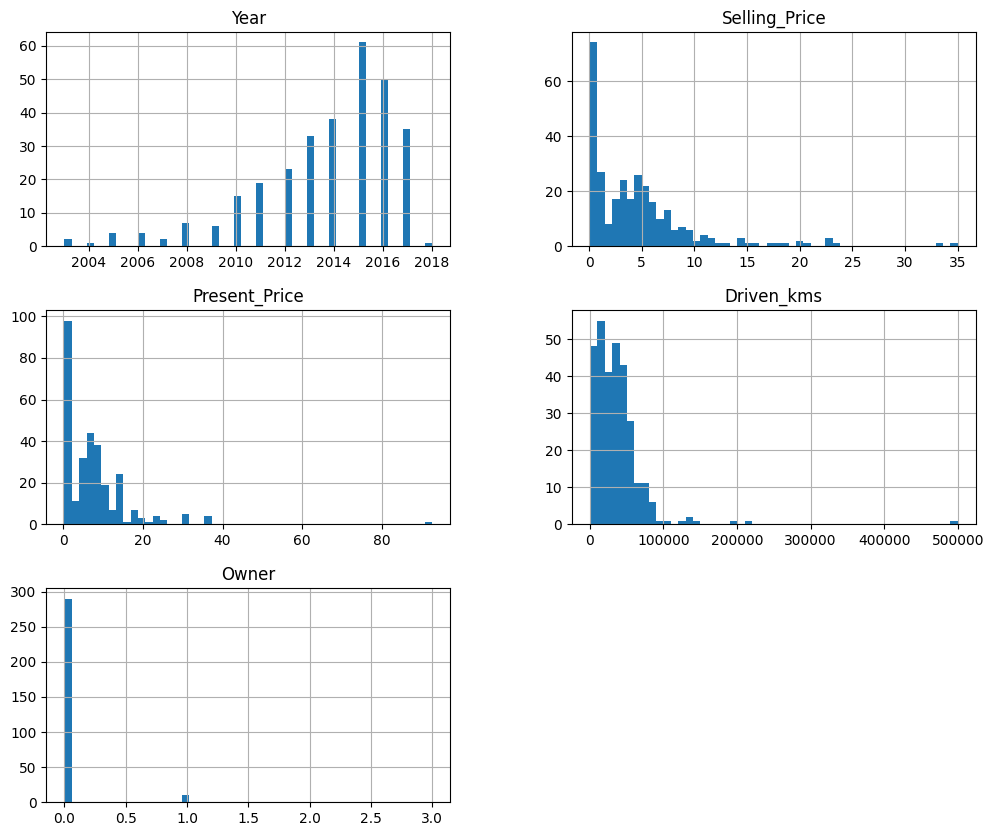

In [320]:
df.hist(figsize = (12,10), bins = 50)
plt.show()

_Check for outliers_

<ipython-input-321-c5bacd316584>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df['Selling_Price'],palette='pastel')


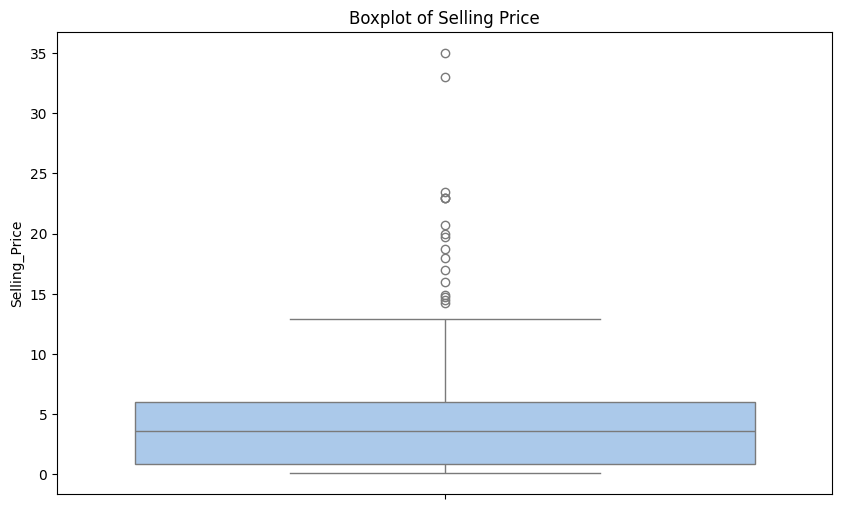

In [321]:
# Check for outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(df['Selling_Price'],palette='pastel')
plt.title('Boxplot of Selling Price')
plt.show()

_Correlation heatmap_

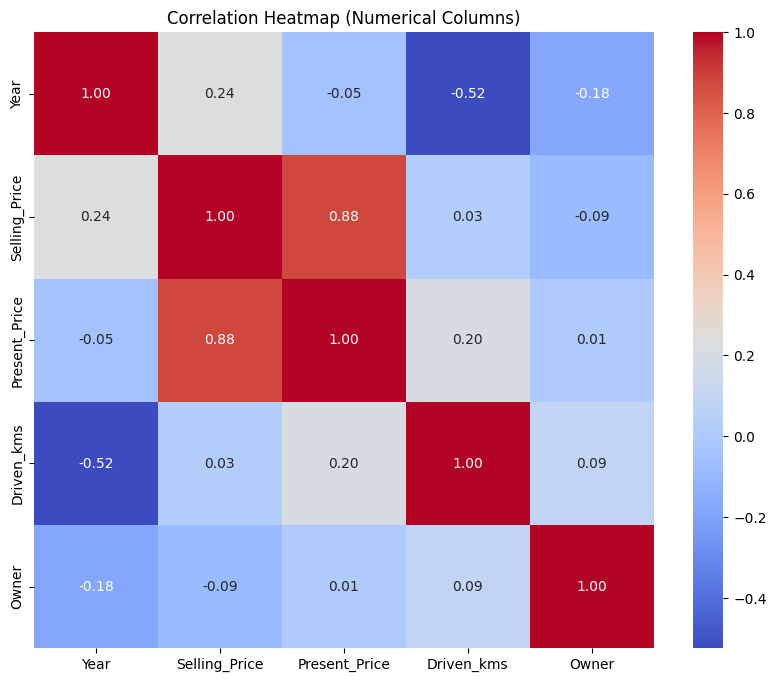

In [322]:
# Select numerical columns
numerical_columns = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms','Owner']

# Create a DataFrame containing only the numerical columns
numerical_df = df[numerical_columns]

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

->   Observations :

* Strong Positive Correlation: Selling Price and Present Price have a very strong positive correlation indicating a nearly perfect linear relationship. This makes sense as present market value likely influences selling price.


* Year's Influence: Year seems weakly negatively correlated with Selling Price, Present Price, and Driven_Kms. Newer cars (lower Year values) tend to have higher selling prices, lower present prices, and lower driven kilometers.


* Mileage Matters: Driven_Kms shows a weak negative correlation with Selling Price and Present Price. Cars with lower mileage (lower Driven_Kms values) tend to sell for more.

****************************************************************************************************************************************************************************************************************************************************************************************************************************

* _Distribution of numerical features_

<ipython-input-323-6d8fbaa4ce6e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Year",data=df,palette="Set1")


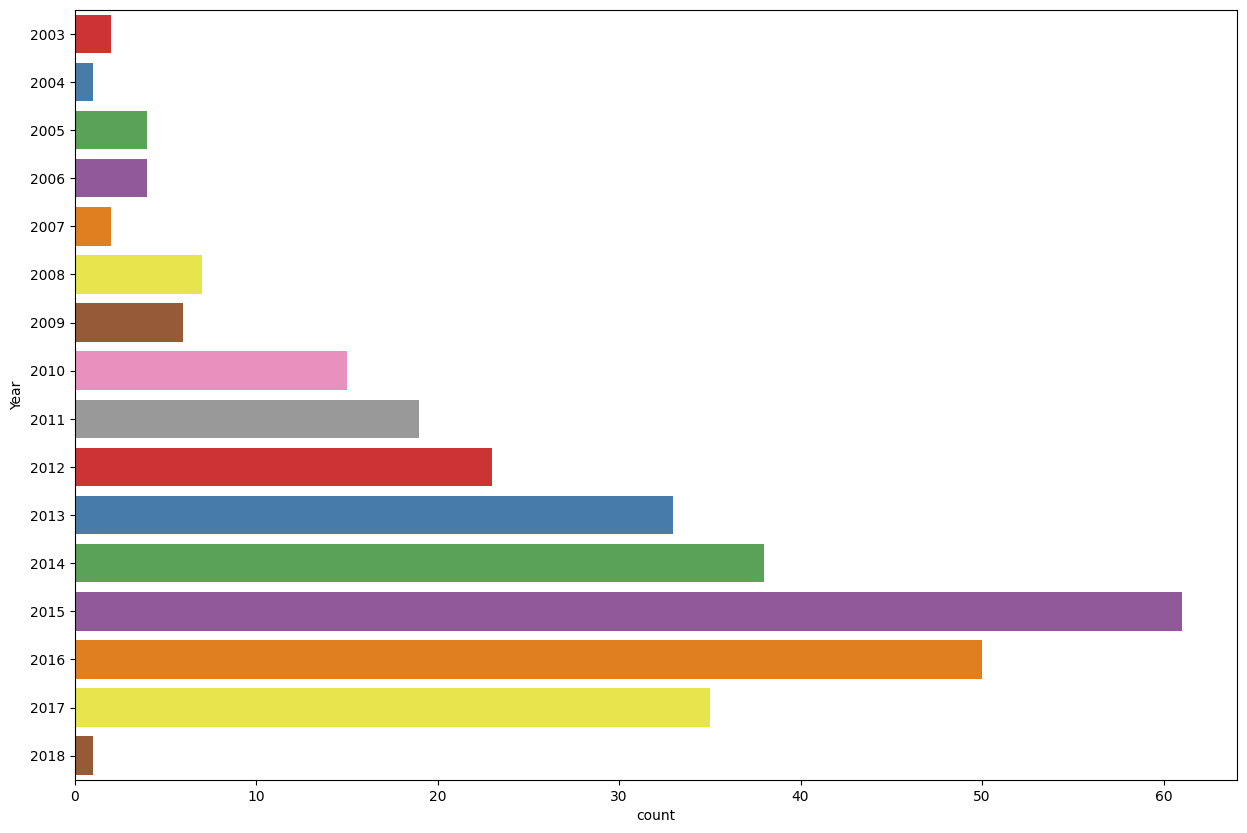

In [323]:
plt.figure(figsize=(15,10))
sns.countplot(y="Year",data=df,palette="Set1")
plt.show()

* Distribution of Numerical Features

<Figure size 1000x600 with 0 Axes>

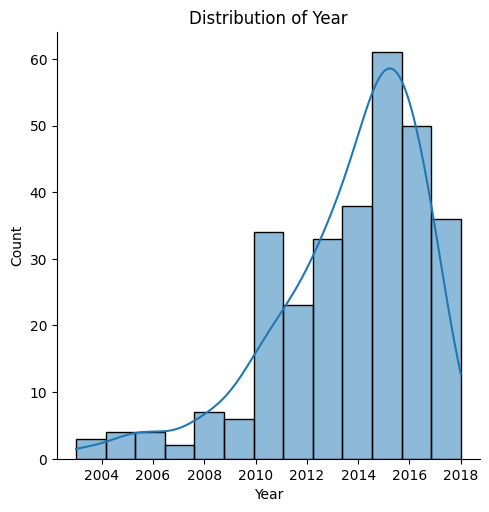

<Figure size 1000x600 with 0 Axes>

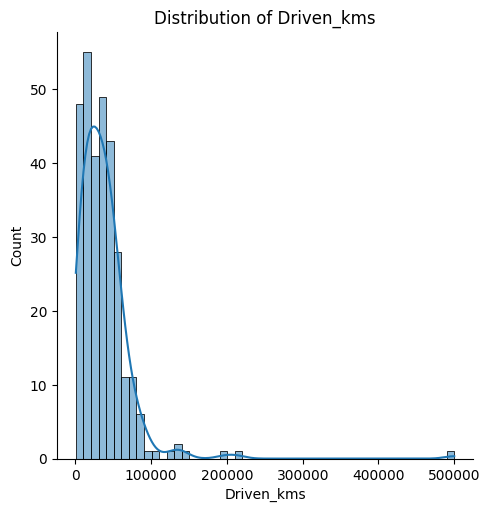

<Figure size 1000x600 with 0 Axes>

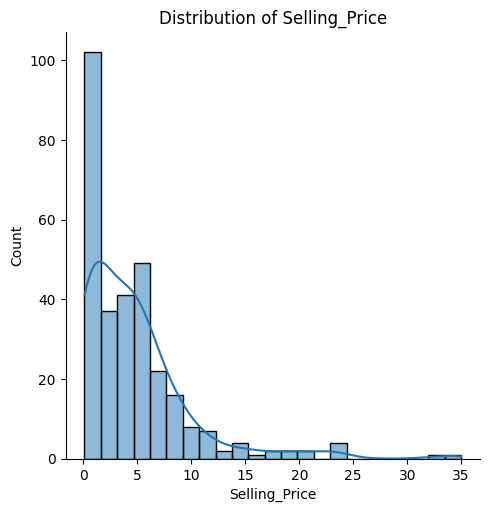

<Figure size 1000x600 with 0 Axes>

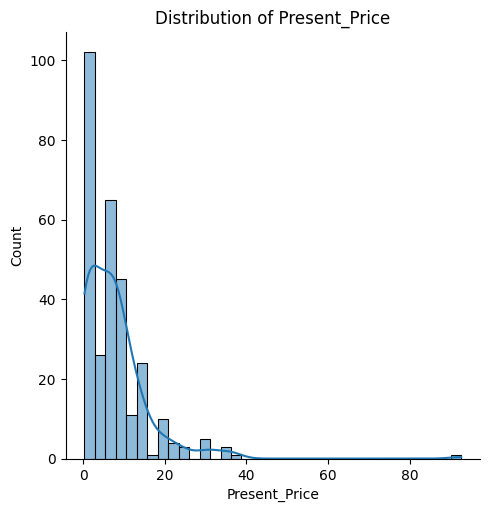

In [324]:
numerical_features = ['Year', 'Driven_kms', 'Selling_Price', 'Present_Price']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.displot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

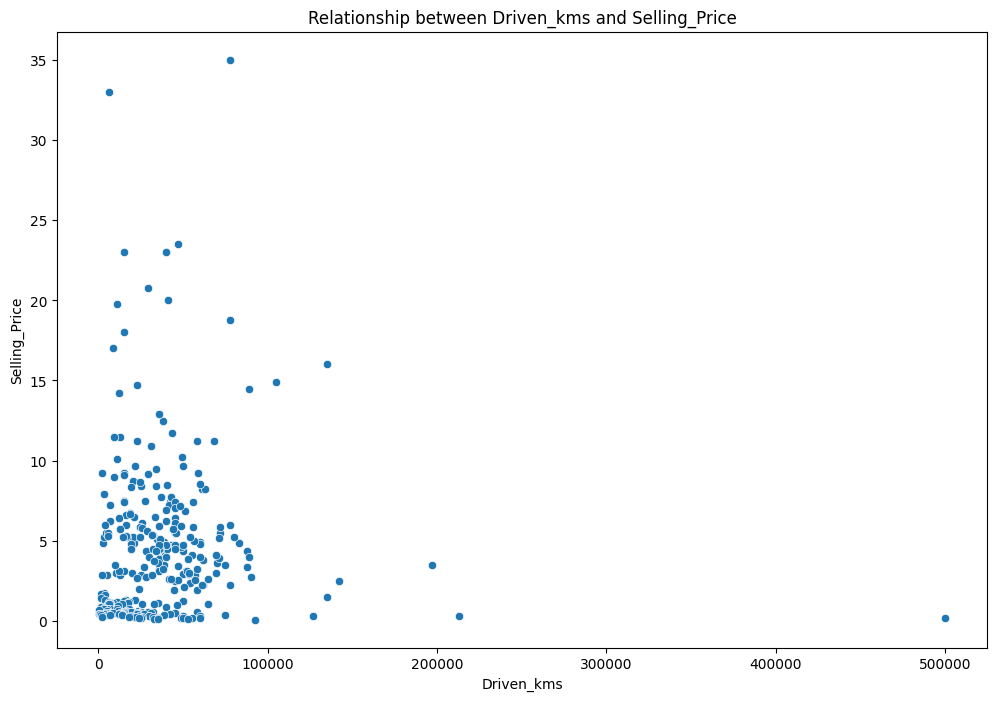

In [325]:
# Scatter plots
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df)
plt.title('Relationship between Driven_kms and Selling_Price')
plt.show()

--- The plot suggests a negative correlation between Driven_Kms and Selling_Price. Cars with higher driven kilometers tend to sell for less.

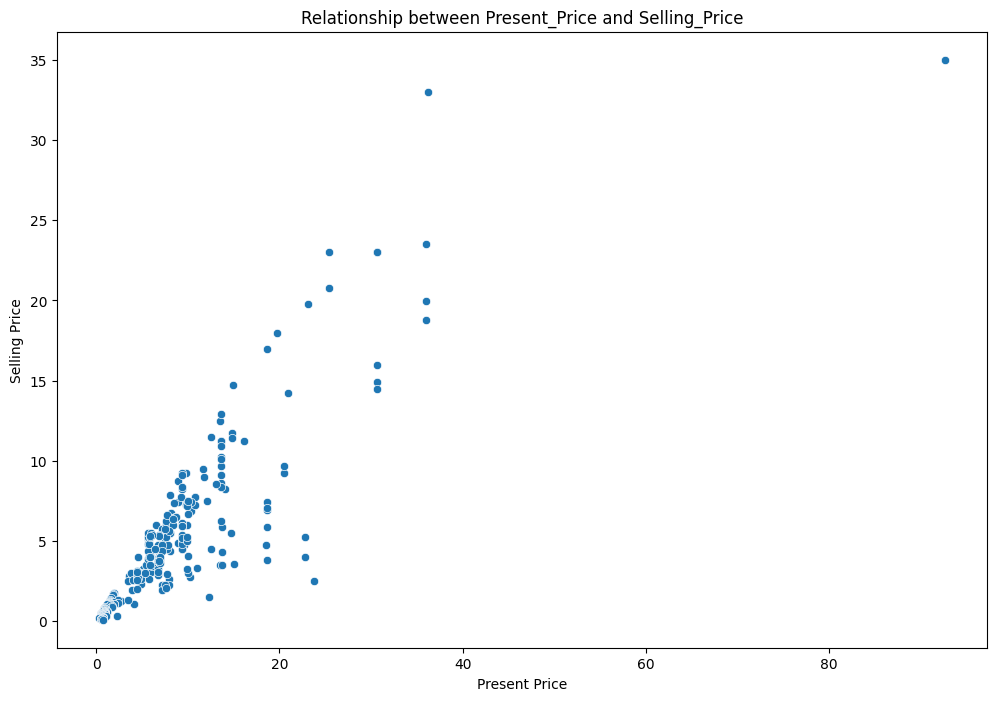

In [326]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title('Relationship between Present_Price and Selling_Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')

plt.show()

Observations :
* Price Match : The plot reveals a strong positive correlation between Present Price and Selling Price. Cars with a higher present market value tend to sell for more.

* Market Influence : This suggests the present market value heavily influences the final selling price.

**************************************************************************************************************************************************************************************************************************************************

_Count Plots of Categorical Features_

<ipython-input-327-d0889b99e71d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette=colors)
<ipython-input-327-d0889b99e71d>:7: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(x=feature, data=df, palette=colors)


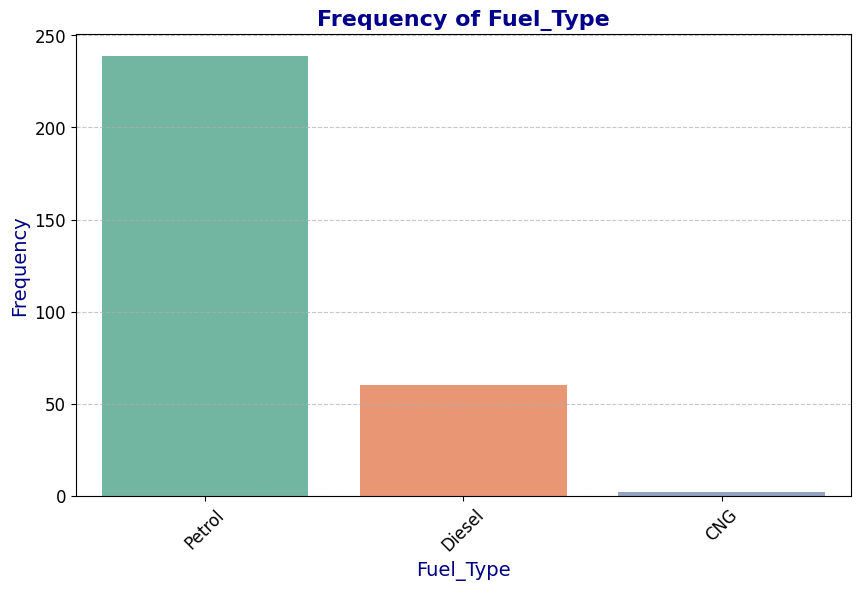

<ipython-input-327-d0889b99e71d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette=colors)
<ipython-input-327-d0889b99e71d>:7: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=df, palette=colors)


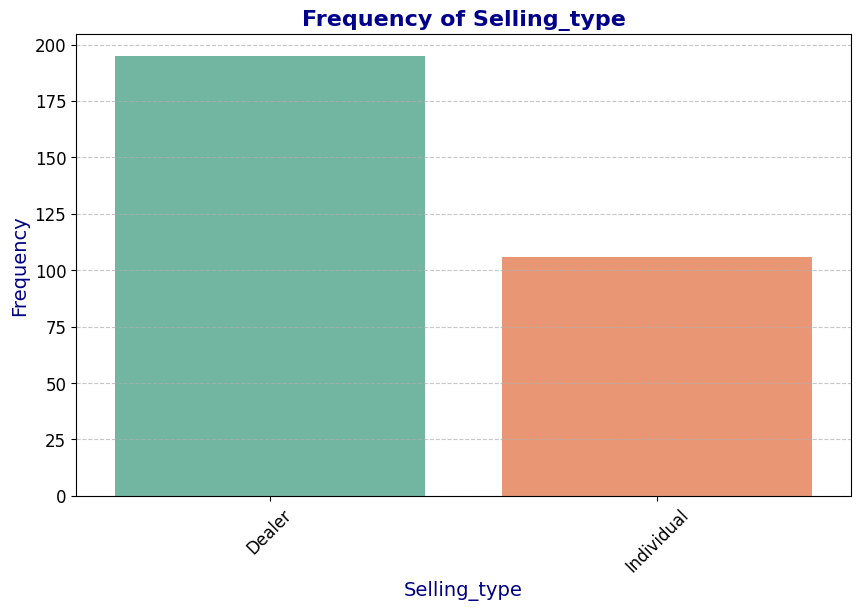

<ipython-input-327-d0889b99e71d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette=colors)
<ipython-input-327-d0889b99e71d>:7: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=df, palette=colors)


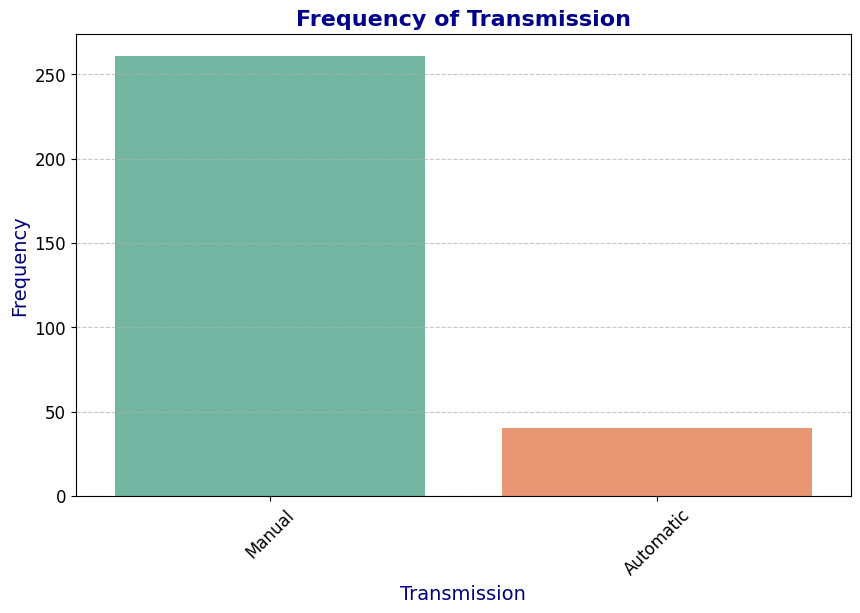

<ipython-input-327-d0889b99e71d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette=colors)
<ipython-input-327-d0889b99e71d>:7: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(x=feature, data=df, palette=colors)


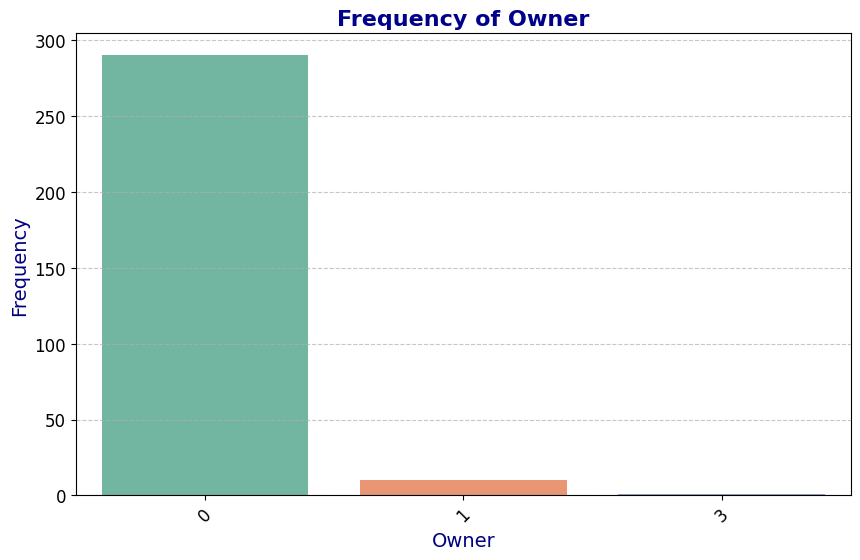

In [327]:
# Define a color palette for the plots
colors = sns.color_palette("Set2")
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
# Plot each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df, palette=colors)
    plt.title(f'Frequency of {feature}', fontsize=16, color='darkblue', fontweight='bold')
    plt.xlabel(f'{feature}', fontsize=14, color='navy')
    plt.ylabel('Frequency', fontsize=14, color='navy')
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

***DATA CLEANING AND TRANSFORMING THE DATA***

* Check features

In [ ]:
#displaying non-numerical columns(columns with objects)
df.select_dtypes(include='object').columns

Index(['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission'], dtype='object')

* Visualizing categorical columns

In [328]:
a=df['Fuel_Type'].value_counts()
a

,count
Fuel_Type,
Petrol,239
Diesel,60
CNG,2


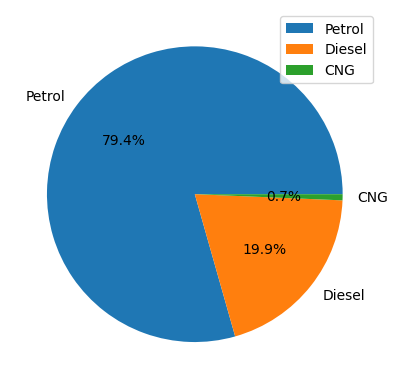

In [329]:
mylabel=['Petrol','Diesel','CNG']
plt.pie(a,labels=mylabel,autopct='%1.1f%%')
plt.legend(loc='upper right')

In [330]:
b=df['Selling_type'].value_counts()
b

,count
Selling_type,
Dealer,195
Individual,106


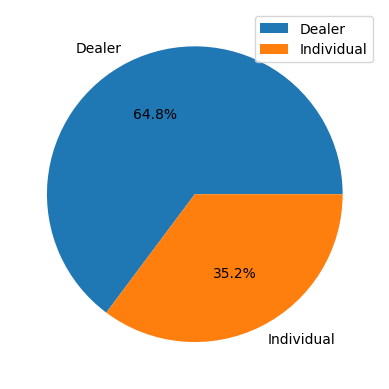

In [331]:
mylabel=['Dealer','Individual']
plt.pie(b,labels=mylabel,autopct='%1.1f%%')
plt.legend(loc='upper right')

In [332]:
c=df['Transmission'].value_counts()
c

,count
Transmission,
Manual,261
Automatic,40


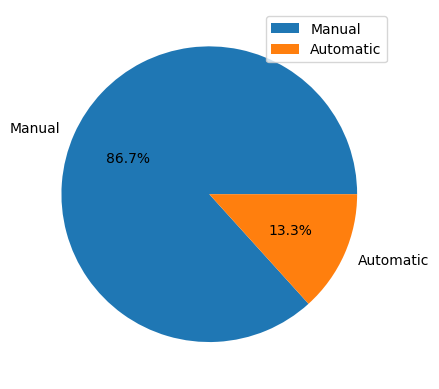

In [333]:
mylabel=['Manual','Automatic']
plt.pie(c,labels=mylabel,autopct='%1.1f%%')
plt.legend(loc='upper right')

In [334]:
d=df['Car_Name'].value_counts()
d

,count
Car_Name,
city,26
corolla altis,16
verna,14
fortuner,11
brio,10
...,...
Honda CB Trigger,1
Yamaha FZ S,1
Bajaj Pulsar 135 LS,1


* Dropping unnecessary columns

In [335]:
df.drop(['Car_Name','Owner'],axis=1,inplace=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Driven_kms     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Selling_type   301 non-null    object 
 6   Transmission   301 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 16.6+ KB


,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual
...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual


In [336]:
#Encoding
#get_dummies encoding technique
df1=pd.get_dummies(df[['Fuel_Type','Selling_type','Transmission']],drop_first=True)
df1

,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,False,True,False,True
1,True,False,False,True
2,False,True,False,True
3,False,True,False,True
4,True,False,False,True
...,...,...,...,...
296,True,False,False,True
297,False,True,False,True
298,False,True,False,True
299,True,False,False,True


In [337]:
dfe=pd.concat([df,df1],axis=1)
dfe

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,False,True,False,True
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,True,False,False,True
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,False,True,False,True
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,False,True,False,True
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,True,False,False,True
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,False,True,False,True
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,False,True,False,True
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,True,False,False,True


In [338]:
dfe.dtypes

,0
Year,int64
Selling_Price,float64
Present_Price,float64
Driven_kms,int64
Fuel_Type,object
Selling_type,object
Transmission,object
Fuel_Type_Diesel,bool
Fuel_Type_Petrol,bool
Selling_type_Individual,bool


In [339]:
#Dropping unwanted columns
dfe.drop(['Fuel_Type','Selling_type','Transmission'],axis=1,inplace=True)
dfe

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,False,True,False,True
1,2013,4.75,9.54,43000,True,False,False,True
2,2017,7.25,9.85,6900,False,True,False,True
3,2011,2.85,4.15,5200,False,True,False,True
4,2014,4.60,6.87,42450,True,False,False,True
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,True,False,False,True
297,2015,4.00,5.90,60000,False,True,False,True
298,2009,3.35,11.00,87934,False,True,False,True
299,2017,11.50,12.50,9000,True,False,False,True


In [340]:
dfe.isna().sum()

,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type_Diesel,0
Fuel_Type_Petrol,0
Selling_type_Individual,0
Transmission_Manual,0


***FEATURE ENGINEERING (FEATURE SELECTION)***

* Seperating X and Y values

In [341]:
x=dfe.drop('Selling_Price',axis=1)
x

,Year,Present_Price,Driven_kms,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,2014,5.59,27000,False,True,False,True
1,2013,9.54,43000,True,False,False,True
2,2017,9.85,6900,False,True,False,True
3,2011,4.15,5200,False,True,False,True
4,2014,6.87,42450,True,False,False,True
...,...,...,...,...,...,...,...
296,2016,11.60,33988,True,False,False,True
297,2015,5.90,60000,False,True,False,True
298,2009,11.00,87934,False,True,False,True
299,2017,12.50,9000,True,False,False,True


In [342]:
y=dfe['Selling_Price']
y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


***MODEL TRAINING, EVALUATION, SELECTION***

* Training and Testing data splitting

In [355]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
x_train

,Year,Present_Price,Driven_kms,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
263,2016,7.70,16002,False,True,False,True
19,2010,7.98,41442,False,True,False,True
14,2009,7.21,77427,False,True,False,True
91,2014,16.09,58242,True,False,False,True
211,2015,14.79,43535,True,False,False,True
...,...,...,...,...,...,...,...
203,2011,4.60,53460,False,True,False,True
255,2012,5.35,53675,False,True,False,True
72,2013,18.61,56001,False,True,False,True
235,2017,9.40,15141,False,True,False,True


In [356]:
x_test

,Year,Present_Price,Driven_kms,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
285,2016,8.500,15059,False,True,False,False
248,2013,4.600,30000,False,True,False,True
150,2011,0.826,6000,False,True,True,True
217,2016,4.430,15000,False,True,False,True
107,2013,1.500,15000,False,True,True,True
...,...,...,...,...,...,...,...
225,2011,4.600,22517,False,True,False,True
138,2016,0.870,15000,False,True,True,True
127,2016,0.800,7000,False,True,True,True
208,2017,8.100,3435,False,True,False,True


In [357]:
y_train

,Selling_Price
263,6.60
19,2.65
14,2.25
91,11.25
211,11.75
...,...
203,2.95
255,3.00
72,7.45
235,9.10


In [358]:
y_test

,Selling_Price
285,7.40
248,4.00
150,0.50
217,3.15
107,1.25
...,...
225,2.70
138,0.60
127,0.75
208,7.90


* Initializing regression models

In [359]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
lr=LinearRegression()
tree_reg = DecisionTreeRegressor()
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgbr = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
lst=[lr,tree_reg,forest_reg,gbr,xgbr]

* Model Performance Evaluation

In [360]:
#Performance Evaluation
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
for i in lst:
  print(" ")
  print("Model name is",i)
  print("************************************************************************")
  i.fit(x_train,y_train)
  print("prediction value is : ")
  y_pred=i.predict(x_test)
  print(y_pred)
  print(" ")
  print("Mean Absolute Error is : ",mean_absolute_error(y_test,y_pred))
  print("Mean Absolute Percentage Error  is : ",mean_absolute_percentage_error(y_test,y_pred))
  print("Mean Squared Error is : ",mean_squared_error(y_test,y_pred))
  print("R2 Score is : ",r2_score(y_test,y_pred))

 
Model name is LinearRegression()
************************************************************************
prediction value is : 
[ 7.73386875e+00  2.93151129e+00 -5.57428101e-01  4.16874280e+00
  5.31143330e-01  5.78492987e+00  2.00111694e+00  2.53270536e+00
  7.71052154e+00  1.03631213e+00  8.10640561e+00  3.49599580e+00
  4.85818333e+00  4.27484291e+00 -2.44109661e+00  3.10054789e+00
  7.98455393e+00  6.74802401e+00  6.79141628e+00  8.01081495e+00
  4.38653432e+00  3.98526899e+00  1.12706687e+01  7.95311711e+00
  8.63376365e+00  3.50780534e+00  3.83589729e+00  1.11279145e+00
 -5.17516937e-01 -5.63774579e-01  6.01256266e-02 -1.23033127e+00
  4.25505425e+00  2.06558255e+01  1.87184104e+01  4.25496427e+00
  3.45907796e+00  1.71258387e+00 -3.37890796e-01  5.65978693e+00
  8.05790367e+00  9.88476785e+00  1.17229647e-01  6.05992524e+00
  5.88649898e+00  4.30314354e+00  7.37069511e+00  5.85118782e+00
  8.20600666e+00  1.71614189e+00  3.79634442e+00  1.79814321e+00
  2.46864708e+00  4.2039

**INSIGHTS FROM THE PERFORMANCE METRICS OF THE DIFFERENT REGRESSION MODELS USED**

* Linear regression provides a moderate fit, but it has the highest MSE and the lowest R² among the models, indicating it may struggle to capture complex relationships in the data.

* The decision tree has lower errors and a significantly higher R² compared to linear regression. However, it might overfit the data since decision trees tend to capture noise.

* Random Forest shows a good balance, with a high R² and lower MAE, though its MSE is slightly higher than Decision Tree, indicating less overfitting.

* Gradient Boosting performs the best in terms of MSE and R², indicating it is effectively capturing the underlying patterns in the data with minimal overfitting.

* XGBoost also performs well, with a slightly lower R² and higher MSE than Gradient Boosting, but still quite robust. It's good at capturing complex patterns with a high degree of accuracy.

Overall Insight: -

In summary, the Gradient Boosting Regressor stands out as the top-performing model for this regression task, providing a robust fit to the data with minimal error and high predictive power.

In [361]:
df2=pd.DataFrame({'Actual_Value':y_test,'Predicted_Value':y_pred,'Difference':y_test-y_pred})
df2

,Actual_Value,Predicted_Value,Difference
285,7.40,7.414775,-0.014775
248,4.00,2.855651,1.144349
150,0.50,0.562492,-0.062492
217,3.15,3.388916,-0.238916
107,1.25,1.244940,0.005060
...,...,...,...
225,2.70,2.922531,-0.222531
138,0.60,0.939699,-0.339699
127,0.75,0.794535,-0.044535
208,7.90,5.908278,1.991722


**REGRESSION PLOT**

<Axes: xlabel='Actual_Value', ylabel='Predicted_Value'>

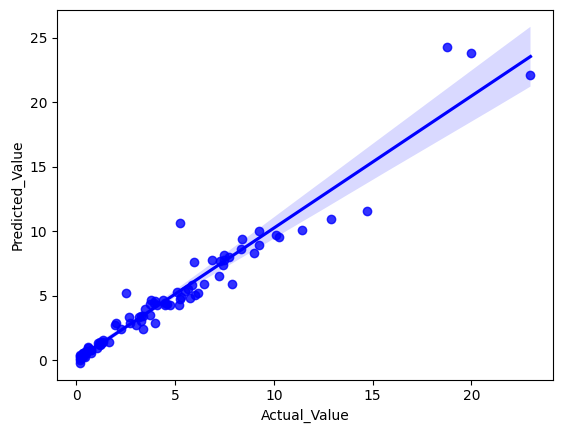

In [362]:
#Actual vs. Predicted Values Plot
sns.regplot(x=df2['Actual_Value'],y=df2['Predicted_Value'],color='blue')

_**INSIGHTS FROM REGRESSION PLOT**_

This regression plot shows the relationship between the actual values (on the x-axis) and the predicted values (on the y-axis). Here are some key insights:

* Strong Linear Relationship:

   The points are closely aligned along the diagonal line (y = x), indicating that the model's predictions are generally accurate and correlate strongly with the actual values.
* Low Residuals:

  Most of the points are close to the regression line, suggesting that the residuals (the differences between actual and predicted values) are small. This implies that the model has a good fit with the data.

* Model Performance:

 Overall, the plot suggests that the model performs well with a strong predictive power.
